In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from experiments.config import PolimiHouse, ARAS, VanKastareen, DAMADICS, CovtFD, scoring
from src.furaki.tree import FurakiTree

In [ ]:
params = CovtFD

In [ ]:
df = pd.read_csv(params.get('dataset'))
y = df.drifting.to_list()
X = df.drop("drifting", axis=1)

tree = FurakiTree(**params)
tree.fit(X)
labels = np.array(tree.predict())

print(params.get("dataset")[5:-4],'F1', scoring['F1'](y, labels, average='macro'))
print(params.get("dataset")[5:-4],'ARI', scoring['ARI'](y, labels))

covtFD F1 0.4402337737506065
covtFD ARI 0.20473324813277302


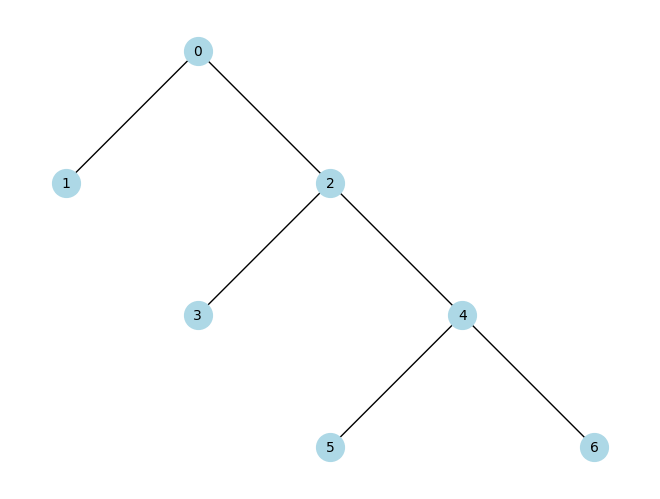

In [44]:
def hierarchy_pos_centered(G, root=None, x=0, y=0, dx=1.0, dy=1.0, pos=None, level=0):
    if pos is None:
        pos = {}

    children = list(G.successors(root))
    
    if not children:
        pos[root] = (x, y)
    else:
        # Posizionamento ricorsivo dei figli
        child_x = x - dx * (len(children) - 1) / 2  # centrare figli
        child_positions = []

        for child in children:
            pos = hierarchy_pos_centered(G, root=child, x=child_x, y=y - dy, dx=dx, dy=dy, pos=pos, level=level+1)
            child_positions.append(pos[child][0])
            child_x += dx

        # Centrare il padre rispetto alla media delle x dei figli
        min_x = min(child_positions)
        max_x = max(child_positions)
        pos[root] = ((min_x + max_x) / 2, y)

    return pos

# --- Plot of the tree ---

a = tree.to_networkx()
root = [n for n,d in a.in_degree() if d==0][0]
pos = hierarchy_pos_centered(a, root=root, x=0, y=0, dx=1.0, dy=1.5)

plt.figure()
nx.draw(
    a,
    pos=pos,
    with_labels=True,
    arrows=False,
    node_size=400,
    node_color='lightblue',
    font_size=10
)
plt.show()

In [52]:
tree.get_nodes()[0].features_all[0][2].__name__

'<lambda>'